<a href="https://colab.research.google.com/github/onuralpArsln/MlAiTutorialProjects/blob/main/5-ImageClass/CatDog/modelTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Datayı Githubdan hızlıca Colabe çek

Data required for this application is collected from a kaggle dataset.  Dataset named Dogs vs. Cats is supplied by kaggle for Playground prediction competition and can be found at https://www.kaggle.com/c/dogs-vs-cats/data.

In [1]:
!wget https://github.com/onuralpArsln/MlAiTutorialProjects/raw/main/5-ImageClass/CatDog/data.zip -O data.zip

--2024-12-19 15:40:21--  https://github.com/onuralpArsln/MlAiTutorialProjects/raw/main/5-ImageClass/CatDog/data.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/onuralpArsln/MlAiTutorialProjects/main/5-ImageClass/CatDog/data.zip [following]
--2024-12-19 15:40:21--  https://raw.githubusercontent.com/onuralpArsln/MlAiTutorialProjects/main/5-ImageClass/CatDog/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46210370 (44M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  44.07M  --.-KB/s    in 0.1s    

2024-12-19 15:40:21 (302 MB/s) - ‘data.zip’ sa

Dosyayı zipten çıkart

In [2]:
!unzip -q data.zip

In [ ]:
!pwd


/content


Burada, os modülünü ve TensorFlow'un image araçlarını kullanarak klasörleri tarayıp görüntüleri okuyoruz ve yeniden boyutlandırıyoruz. İşlem sırasında etiketler de belirleniyor (cats için 0, dogs için 1).

In [3]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Verinin bulunduğu ana klasör
dataset_dir = 'test_set'

# Görselleri okuma ve etiketleme fonksiyonu
def load_images_from_directory(base_dir, label, img_size=(128, 128)):
    images = []
    labels = []
    for file_name in os.listdir(base_dir):
        file_path = os.path.join(base_dir, file_name)
        if file_name.endswith('.jpg'):
            # Görüntüyü oku ve yeniden boyutlandır
            img = tf.keras.preprocessing.image.load_img(file_path, target_size=img_size)
            img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize et
            images.append(img_array)
            labels.append(label)
    return images, labels

# Görselleri yükle
cat_images, cat_labels = load_images_from_directory(os.path.join(dataset_dir, 'cats'), label=0)
dog_images, dog_labels = load_images_from_directory(os.path.join(dataset_dir, 'dogs'), label=1)

# Verileri birleştir
images = np.array(cat_images + dog_images)
labels = np.array(cat_labels + dog_labels)

# Veriyi train ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


Data Preprocessing - Resizing and Splitting
Bu aşamada, görüntüleri normalleştirdiğimizden emin olduk ve eğitim/test verilerini doğru şekilde böldük. Şimdi doğrulama verilerini eğitim verisinden ayırabiliriz:

In [4]:
# Eğitim verilerinden bir kısmını doğrulama için ayır
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Model Building

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# CNN modelini oluştur
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification için
])

# Modeli derle
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train

In [10]:
# Modeli eğit
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=32
)


Epoch 1/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9950 - loss: 0.0472 - val_accuracy: 0.6605 - val_loss: 1.4810
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9942 - loss: 0.0422 - val_accuracy: 0.6667 - val_loss: 1.5551
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9955 - loss: 0.0328 - val_accuracy: 0.6543 - val_loss: 1.7021
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9910 - loss: 0.0378 - val_accuracy: 0.6605 - val_loss: 1.7705
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9978 - loss: 0.0152 - val_accuracy: 0.6574 - val_loss: 1.7953
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 0.0140 - val_accuracy: 0.6698 - val_loss: 1.9510
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9974 - loss: 0.0190 - val_accuracy: 0.6698 - val_loss: 1.7932
Epoch 8/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9990 - loss: 0.0130 - val_accuracy: 0.6543 - v

Evaluation and Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


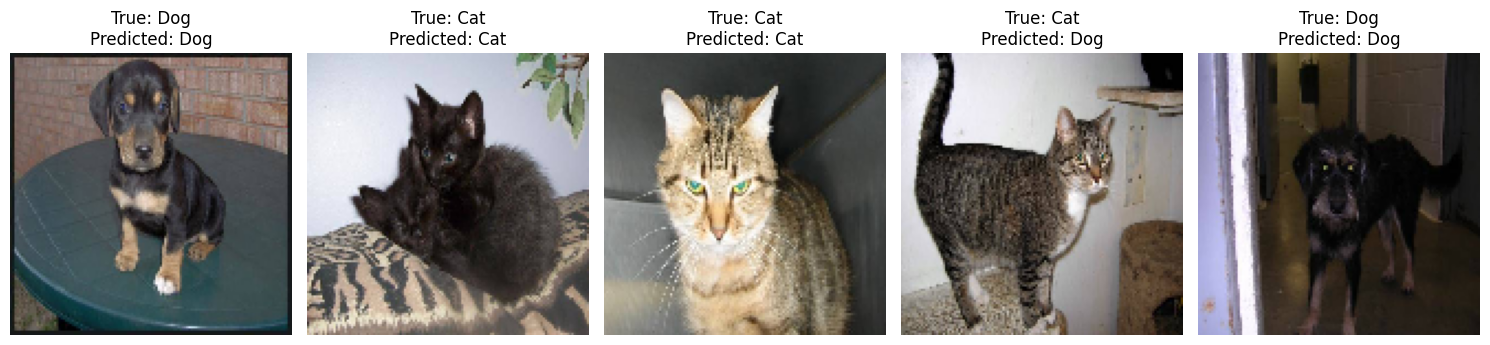

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Select 5 random indices from the test set
random_indices = np.random.choice(len(X_test), 5, replace=False)

# Plot each sample and show its predicted label
plt.figure(figsize=(15, 8))
for i, idx in enumerate(random_indices):
    sample_image = X_test[idx]
    prediction = model.predict(sample_image.reshape(1, 128, 128, 3))
    true_label = "Dog" if y_test[idx] == 1 else "Cat"
    predicted_label = "Dog" if prediction[0] > 0.5 else "Cat"

    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_image)
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


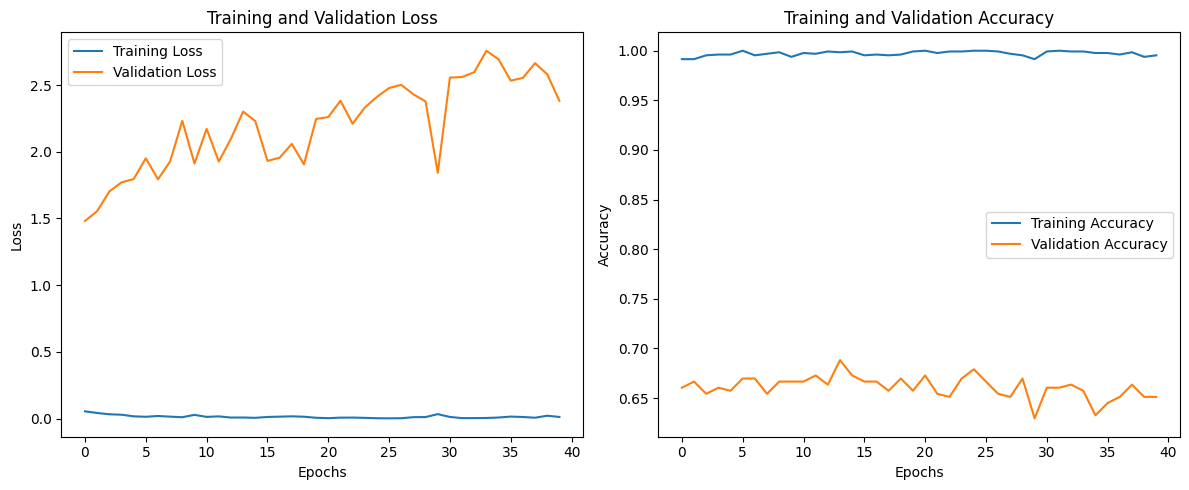

In [12]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


kaydetme

In [ ]:
# Modeli kaydet
model.save('/content/cat_dog_classifier.h5')
